In [5]:
# VT-PXRD-Plotter
### Visualization and analysis of variable-temperature powder XRD data

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import os
import re
import matplotlib
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
import glob

In [7]:
git clone https://github.com/arnablattice/VT-PXRD-Plotter.git

SyntaxError: invalid syntax (3513958450.py, line 1)

In [19]:
# set dpi for plots
mpl.rcParams['figure.dpi'] = 200

In [20]:
dataFolder = r"E:\Projects\Cu-Ge-Te\PXRD\Jayanta\Mechanism\29-05-25(CGT-Phase study)\data\python"

In [21]:
xy_files = [os.path.join(dataFolder, f) for f in os.listdir(dataFolder) if f.endswith('.xy')]

In [22]:
# Initialize an empty list to collect the intensity data columns
all_data = []

In [23]:
for file in xy_files:
    try:
        # Read the .xy file (assuming space-separated columns)
        df = pd.read_csv(file, sep=r'\s+', header=None, names=['2theta', 'Intensity'])

        # Extract the intensity column title from the filename (e.g., "25deg")
        filename = os.path.basename(file)
        match = re.search(r'^(\d+deg)\.xy$', filename)  # Match filenames like "25deg.xy"

        if match:
            intensity_title = match.group(1)
            # Add the '2theta' and renamed 'Intensity' column
            all_data.append(df[['2theta', 'Intensity']].rename(columns={'Intensity': intensity_title}))
            print(f"Processed {filename}")
        else:
            print(f"Skipped {filename}: filename does not match the expected pattern '<angle>deg.xy'")
    
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Concatenate and save if any valid data is found
if all_data:
    # Combine data on columns
    df_all = pd.concat(all_data, axis=1)

    # Drop duplicated '2theta' columns, keeping only the first one
    df_all = df_all.loc[:, ~df_all.columns.duplicated()]

    # Ensure '2theta' is the first column
    columns = ['2theta'] + [col for col in df_all.columns if col != '2theta']
    df_all = df_all[columns]

    # Sort angle columns numerically (extract numbers before sorting)
    sorted_columns = ['2theta'] + sorted(
        [col for col in df_all.columns if col != '2theta'],
        key=lambda x: int(re.match(r'(\d+)', x).group(1))
    )
    df_all = df_all[sorted_columns]

    # Save the consolidated data
    output_file = os.path.join(dataFolder, 'consolidated_data.csv')
    df_all.to_csv(output_file, index=False)
    print(f"✅ Consolidated data saved to {output_file}")
else:
    print("⚠️ No valid data found. Nothing to save.")

Processed 25deg.xy
Processed 300deg.xy
Processed 330deg.xy
Processed 350deg.xy
Processed 400deg.xy
Processed 450deg.xy
Processed 500deg.xy
Processed 550deg.xy
Processed 600deg.xy
Processed 650deg.xy
Processed 700deg.xy
✅ Consolidated data saved to E:\Projects\Cu-Ge-Te\PXRD\Jayanta\Mechanism\29-05-25(CGT-Phase study)\data\python\consolidated_data.csv


In [3]:
file_path = 'consolidated_data.csv'
data = pd.read_csv(file_path)

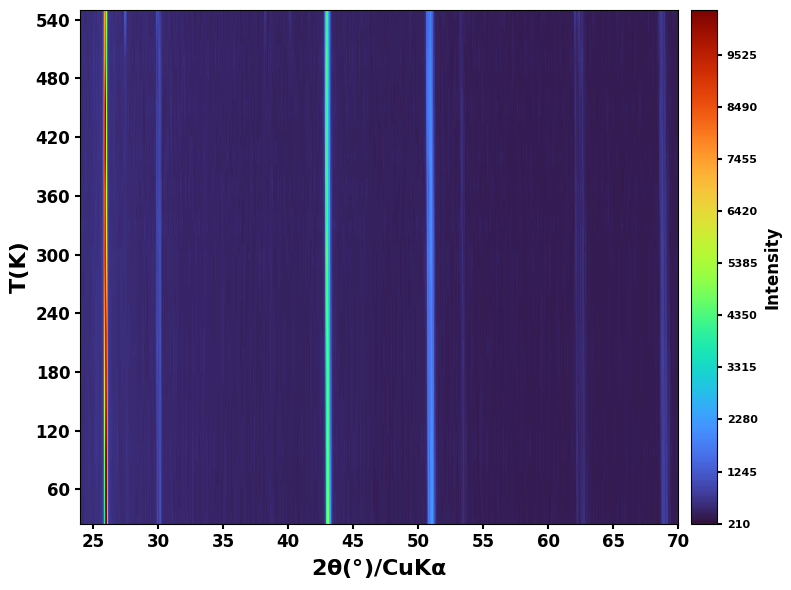

In [7]:
x = data.iloc[:, 0].values  # Extract 2theta values

# Extract temperature values from column headers
y = []
for col in data.columns[1:]:
    match = re.search(r'(\d+)', col)
    if match:
        y.append(float(match.group(1)))
    else:
        print(f"Skipping invalid column header: {col}")

if not y:
    raise ValueError("No valid temperature columns found.")

Z = data.iloc[:, 1:].values
if Z.shape != (len(y), len(x)):
    Z = Z.T  # Transpose if shape mismatch

# Create meshgrid
X, Y = np.meshgrid(x, y)

# Plot
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z, cmap='turbo', levels=1000)
cbar = plt.colorbar(cp, label='Intensity', fraction=0.05, pad=0.02)
cbar.set_label('Intensity', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=8, width=1.5)
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')

# Axis Formatting
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))

plt.xlabel(r'$\mathbf{2\theta(\degree)/\mathbf{CuK\alpha}}$', fontsize=16, fontweight='bold')
plt.ylabel('T(K)', fontsize=16, fontweight='bold')
plt.xlim(24, 70)
plt.ylim(min(y), max(y))
plt.tick_params(axis='both', which='major', labelsize=12, width=1.5)
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.savefig('contour_plot.png', dpi=300)
plt.show()